# Project 1 Data Exploration and Analysis
##### 5/16/2020
##### Yang Zhang, Reannan McDaniel, Jonathan Roach, Fred Poon

### Business Understanding - describe the purpose of the data set you selected.

<!-- [10] Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How  would you measure the effectiveness of a good prediction algorithm? Be specific. -->

<!--
title: "ML1-CaseStudy1"
author: "Reannan McDaniel"
output: html_document
-->

Choosing the right data set for to perform multiple types of tests across different types of data can be a challenge.  There needs to be sufficient variables, more than 30 is a good base, and about 25,000 rows of data.  The variables should include a combination of continuous and categorical variables in order to run regression or classification models.  
We decided to work with The Belk Foundation data sets from 2014 to 2017.  These data sets encompass information across 4 continuous years of educational attributes in North Carolina, USA.  For the purpose of this exercise our focus is around school performance on different types  of characteristics like  schools, type of school, social demographic, economic demographics, location and school category within 2014-2017.  The Belk Foundation's website says, "Our goal is to empower today’s workforce by creating pathways to and through postsecondary education for underrepresented students". For the sake of this analysis, we assume that better performing schools have better outcomes in postsecondary education. With North Carolina's rapidly-changing demographics, it is important to take into consideration schools' unique needs when allocating funds to strategic investment initiatives. Here, we explore where funding can be best applied based to educational achievement data.
In order to achieve this goal, we will explore through visual and mathematical modeling which features best predict the School Performance Grade (SPG), a measure of a school's overall success based on test scores and growth measures. 

### Data Understanding
#### Describe the attributes

In [29]:
# [10] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.
import pandas as pd
import numpy as np

schools = pd.read_csv('PublicSchools2014to2017_YZ.csv')
schools.head()

,vphone_ad,street_ad,scity_ad,szip_ad,category_cd,url_ad,grade_range_cd,calendar_type_txt,sna_pgm_type_cd,school_type_txt,...,MinorityFemalePct,MinorityMalePct,PacificIslandFemalePct,PacificIslandMalePct,PacificIslandPct,TwoOrMoreFemalePct,TwoOrMoreMalePct,TwoOrMorePct,unit_code,Year
0,(336)506-4001,1247 Jimmie Kerr Road,Graham,27253.0,H,http://amc.abss.k12.nc.us,9-12,"Regular School, Traditional Calendar",R,Regular School,...,0.243243,0.067568,0.000000,0.000000,0.00000,0.000000,0.013514,0.013514,10303,2014
1,(336)578-1366,2518 NC 54,Graham,27253.0,E,http://awe.abss.k12.nc.us,PK-5,"Regular School, Traditional Calendar",R,Regular School,...,0.157699,0.163265,0.000000,0.000000,0.00000,0.014842,0.020408,0.035250,10304,2014
2,(336)538-6030,2832 N NC 87,Elon,27244.0,E,http://aoe.abss.k12.nc.us,K-5,"Regular School, Traditional Calendar",R,Regular School,...,0.094096,0.107011,0.001845,0.001845,0.00369,0.011070,0.012915,0.023985,10308,2014
3,(336)570-6195,2229 Broadview Drive,Burlington,27217.0,M,http://brm.abss.k12.nc.us/,6-8,"Regular School, Traditional Calendar",R,Regular School,...,0.445980,0.463568,0.000000,0.000000,0.00000,0.011307,0.013819,0.025126,10310,2014
4,(336)538-8700,3720 Bonnar Bridge Parkway,Burlington,27215.0,E,http://hle.abss.k12.nc.us,K-5,"Regular School, Traditional Calendar",R,Regular School,...,0.164134,0.173252,0.000000,0.000000,0.00000,0.019757,0.028875,0.048632,10312,2014


In [30]:
schools.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 259 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   vphone_ad                            object 
 1   street_ad                            object 
 2   scity_ad                             object 
 3   szip_ad                              float64
 4   category_cd                          object 
 5   url_ad                               object 
 6   grade_range_cd                       object 
 7   calendar_type_txt                    object 
 8   sna_pgm_type_cd                      object 
 9   school_type_txt                      object 
 10  calendar_only_txt                    object 
 11  title1_type_cd                       object 
 12  District Name                        object 
 13  esea_status                          object 
 14  student_num                          float64
 15  lea_avg_student_num                  

It is important to understand the types of schools that are relevant to this analysis. Let's first take a look at school type and see if there are any anomolies (schools for children with disabilities, for example).

In [85]:
pd.DataFrame(schools.school_type_txt.value_counts())

,school_type_txt
Regular School,8810
Magnet School,527
Alternative Education,291
Special Education,82
Hospital School,14
0,6
Vocational Education,1


"Regular" schools seem to make up the majority of the dataset, so we will focus on those for now. Perhaps we can come back to the other school types later and analyze them separately.

In [84]:
schools2 = schools[schools["school_type_txt"] == 'Regular School']
pd.DataFrame(schools2["school_type_txt"].unique())

,0
0,Regular School


Let's now take a look at schools by the age ranges of their students: elementary, middle, high, and various combinations of the three.

In [89]:
schools2['category_cd'] == 'E'
schools2['category_cd_modified'] = np.select(
    [
        schools2['category_cd'] == 'A', 
        schools2['category_cd'] == 'E',
        schools2['category_cd'] == 'H',
        schools2['category_cd'] == 'I',
        schools2['category_cd'] == 'M'
    ], 
    [
        'Elem./Mid./High Together', 
        'Elementary School',
        'High School',
        'Elem./Mid. Together',
        'Middle School'
    ],
    default='Mid./High Together'
)

pd.DataFrame(schools2['category_cd_modified'].unique())


,0
0,High School
1,Elementary School
2,Middle School
3,Elem./Mid. Together
4,Mid./High Together
5,Elem./Mid./High Together


Some of these categories have very little representation in the data. For now, we'll remedy this by lumping the combo groups together.

In [92]:
# [15] Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods. 

combo = schools2['category_cd_modified'].str.contains('/', regex=False)

schools2['category_cd_modified'] = np.where(combo, 'Combo', schools2['category_cd_modified'])

pd.DataFrame(schools2.category_cd_modified.value_counts())

,category_cd_modified
Elementary School,4848
High School,1826
Middle School,1771
Combo,365


We now need to somehow get at the idea of demographic composition of schools. Dr. Drew and his capstone groups have shown that classifying schools as majority-minority when they are composed of >50% non-white students highlights meaningful differences in school performance (likely due to the fact that demographics can serve as a stand-in for economic measures). Let's take the same approach.

In [94]:
schools2['MinorityOverallPct'] = schools2['MinorityMalePct'] + schools2['MinorityFemalePct']

schools2['Majority_Minority'] = np.where(schools2['MinorityOverallPct'] > .5, 1,0)

pd.DataFrame(schools2['Majority_Minority'].value_counts())

,Majority_Minority
0,4833
1,3977


#### Visualize appropriate statistics (summary statistics)

In [95]:
# [10] Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 



#### Visualize most interesting attributes

In [64]:
# [15] Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate. 

#### Visualize relationships

Now let's do a univariate analysis on the impact of attendance rates on school performance grade. The expectation prior to doing the analysis is that poor attendance rates result in poor school performance.

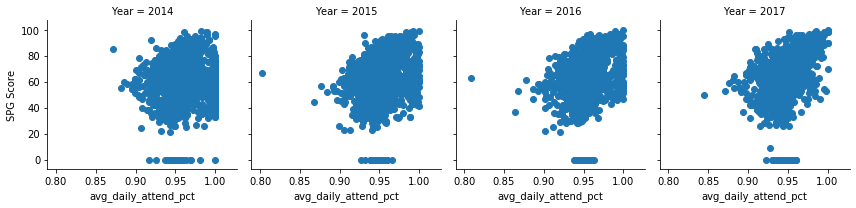

In [65]:
# [15] Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships. 
import matplotlib.pyplot as plt
import seaborn as sns

grid = sns.FacetGrid(schools2, col="Year")
grid.map(plt.scatter, 'avg_daily_attend_pct', 'SPG Score')

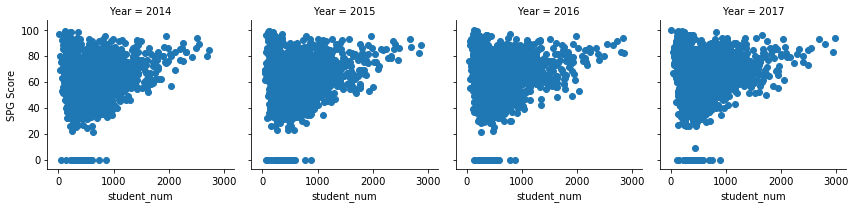

In [66]:
grid = sns.FacetGrid(schools2, col='Year')
grid.map(plt.scatter, 'student_num', 'SPG Score')

While this isn't a good measure of class size (we have no way of measuring student/teacher ratio. Just raw number of students), it's interesting to observe that larger public schools generally receive higher grades than smaller ones. It could be the case that here the size of the school is a stand-in for the rurality of the school. In rural areas, schools will be smaller, and there will be fewer opportunities for students. What happens when we color by the majority-minority variable? Of particular interest are high schools.

Identify and explain interesting relationships

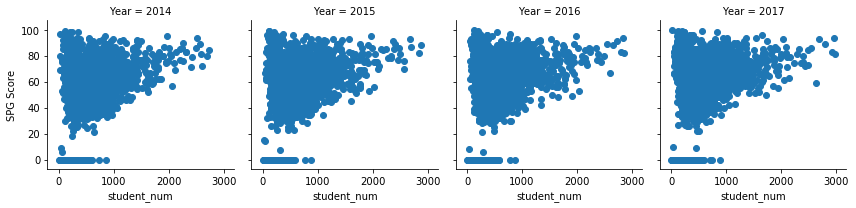

In [67]:
# [10] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification). 

grid = sns.FacetGrid(schools, col='Year')
grid.map(plt.scatter, 'student_num', 'SPG Score')

#### Other features

For other features, we can bring in data from either the GSS (General Social Survey) or the Census dataset to bring in external factors such as income % and or tax brackets. With these features we can run additional assumptions on how some of these new features affect students and their scores.

In [68]:
# [5] Are there other features that could be added to the data or created from existing features? Which ones? 

### Exceptional Work

Because we combined the data provided, we were able to create trends between 2014 and 2017. First, we'll look at the trend of SPG score over these years.

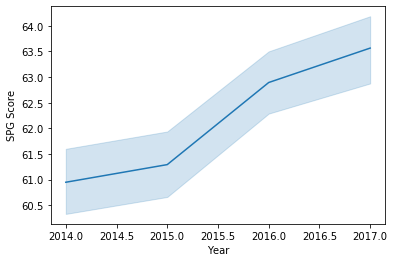

In [69]:
# [10]
# • You have free reign to provide additional analyses.
# • One idea: implement dimensionality reduction, then visualize and interpret the results. 

import seaborn as sb

schools2 = schools2[schools2["school_type_txt"]!= 0]
sb.lineplot(x="Year", y="SPG Score", data=schools2)

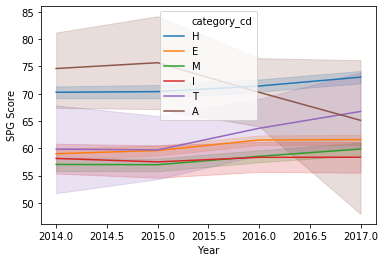

In [70]:
# trendline by category
sb.lineplot(x="Year", y="SPG Score", hue="category_cd", data=schools2)

In [71]:
from sklearn.decomposition import PCA
import numpy as np

# let's start by first changing the numeric values to be floats
continuous_features = []

# and the oridnal values to be integers
ordinal_features = []

# we won't touch these variables, keep them as categorical
categ_features = [];

# use the "astype" function to change the variable type
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)

df.info() # now our data looks better!!

df.info(verbose=True)
df_pca =

pca = PCA(n_components=2)
x_pca = pca.fit(df).transform(df)

SyntaxError: invalid syntax (<ipython-input-71-a26bb1d7b7c1>, line 20)